In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import math
import matplotlib.ticker as mticker
import numpy as np
import random
from datetime import time

## I. World Building
### Here we define the route, the fare, and the different kinds of commuters and public transportation

In [2]:
route_length = 24
minimum_fare = 13
minimum_distance = 4
additional_charge_per_unit = 1.50
unit = 'kilometer'
hours_to_complete_route = 2

possible_passengers = []
list_of_vehicles = []
company_raw_data = {'vehicle_id': [], 'boarding_time': [], 'boarding_place': [], 'disembarking_time': [], 'disembarking_place': [], 'payment': []}


class MorningPassenger:
    def __init__(self, mean_start_place):
        # Defining when the passenger starts waiting for public transport
        self.mean_start_hour = 7
        self.sigma_start_hour = 1.8
        self.start_hour = -1
        while self.start_hour < 0 or self.start_hour >= 24:
            self.start_hour = int(round(np.random.normal(self.mean_start_hour, self.sigma_start_hour, 1)[0], 0))
        self.start_minute = random.randint(0, 59)
        self.start_second = random.randint(0, 59)
        self.start_time = time(self.start_hour, self.start_minute, self.start_second)

        # Defining where the passenger waits for public transport
        self.mean_start_place = mean_start_place
        self.sigma_start_place = 2
        self.start_place = -1
        while self.start_place < 0 or self.start_place >= route_length:
            self.start_place = int(round(np.random.normal(self.mean_start_place, self.sigma_start_place, 1)[0], 0))

        # Defining where the passenger wants to go to
        self.mean_end_place = (route_length + self.start_place) / 2
        self.sigma_end_place = 4
        self.end_place = self.start_place - 1
        while self.end_place <= self.start_place or self.end_place > route_length:
            self.end_place = int(round(np.random.normal(self.mean_end_place, self.sigma_end_place, 1)[0], 0))

        # Defining the fare the passenger will pay
        if self.end_place - self.start_place <= 4:
            self.payment = minimum_fare
        else:
            self.payment = minimum_fare + (self.end_place - self.start_place - minimum_distance) * additional_charge_per_unit

        global possible_passengers
        possible_passengers.append([self.start_time, self.start_place, self.end_place, self.payment])


class NoonPassenger:
    def __init__(self, mean_start_place):
        # Defining when the passenger starts waiting for public transport
        self.mean_start_hour = 12
        self.sigma_start_hour = 1.2
        self.start_hour = -1
        while self.start_hour < 0 or self.start_hour >= 24:
            self.start_hour = int(round(np.random.normal(self.mean_start_hour, self.sigma_start_hour, 1)[0], 0))
        self.start_minute = random.randint(0, 59)
        self.start_second = random.randint(0, 59)
        self.start_time = time(self.start_hour, self.start_minute, self.start_second)
        
        # Defining where the passenger waits for public transport
        self.mean_start_place = mean_start_place
        self.sigma_start_place = 3
        self.start_place = -1
        while self.start_place < 0 or self.start_place >= route_length:
            self.start_place = int(round(np.random.normal(self.mean_start_place, self.sigma_start_place, 1)[0], 0))

        # Defining where the passenger wants to go to
        self.mean_end_place = (route_length + self.start_place) / 2
        self.sigma_end_place = 4
        self.end_place = self.start_place - 1
        while self.end_place <= self.start_place or self.end_place > route_length:
            self.end_place = int(round(np.random.normal(self.mean_end_place, self.sigma_end_place, 1)[0], 0))

        # Defining the fare the passenger will pay
        if self.end_place - self.start_place <= 4:
            self.payment = minimum_fare
        else:
            self.payment = minimum_fare + (self.end_place - self.start_place - minimum_distance) * additional_charge_per_unit

        global possible_passengers
        possible_passengers.append([self.start_time, self.start_place, self.end_place, self.payment])


class AfternoonPassenger:
    def __init__(self, mean_start_place):
        # Defining when the passenger starts waiting for public transport
        self.mean_start_hour = 17
        self.sigma_start_hour = 2.5
        self.start_hour = -1
        while self.start_hour < 0 or self.start_hour >= 24:
            self.start_hour = int(round(np.random.normal(self.mean_start_hour, self.sigma_start_hour, 1)[0], 0))
        self.start_minute = random.randint(0, 59)
        self.start_second = random.randint(0, 59)
        self.start_time = time(self.start_hour, self.start_minute, self.start_second)
        
        # Defining where the passenger waits for public transport
        self.mean_start_place = mean_start_place
        self.sigma_start_place = 1.8
        self.start_place = -1
        while self.start_place < 0 or self.start_place >= route_length:
            self.start_place = int(round(np.random.normal(self.mean_start_place, self.sigma_start_place, 1)[0], 0))

        # Defining where the passenger wants to go to
        self.mean_end_place = (route_length + self.start_place) / 2
        self.sigma_end_place = 4
        self.end_place = self.start_place - 1
        while self.end_place <= self.start_place or self.end_place > route_length:
            self.end_place = int(round(np.random.normal(self.mean_end_place, self.sigma_end_place, 1)[0], 0))

        # Defining the fare the passenger will pay
        if self.end_place - self.start_place <= 4:
            self.payment = minimum_fare
        else:
            self.payment = minimum_fare + (self.end_place - self.start_place - minimum_distance) * additional_charge_per_unit

        global possible_passengers
        possible_passengers.append([self.start_time, self.start_place, self.end_place, self.payment])

        
class EveningPassenger:
    def __init__(self, mean_start_place):
        # Defining when the passenger starts waiting for public transport
        self.mean_start_hour = 20
        self.sigma_start_hour = 1.8
        self.start_hour = -1
        while self.start_hour < 0 or self.start_hour >= 24:
            self.start_hour = int(round(np.random.normal(self.mean_start_hour, self.sigma_start_hour, 1)[0], 0))
        self.start_minute = random.randint(0, 59)
        self.start_second = random.randint(0, 59)
        self.start_time = time(self.start_hour, self.start_minute, self.start_second)
        
        # Defining where the passenger waits for public transport
        self.mean_start_place = mean_start_place
        self.sigma_start_place = 3
        self.start_place = -1
        while self.start_place < 0 or self.start_place >= route_length:
            self.start_place = int(round(np.random.normal(self.mean_start_place, self.sigma_start_place, 1)[0], 0))

        # Defining where the passenger wants to go to
        self.mean_end_place = (route_length + self.start_place) / 2
        self.sigma_end_place = 4
        self.end_place = self.start_place - 1
        while self.end_place <= self.start_place or self.end_place > route_length:
            self.end_place = int(round(np.random.normal(self.mean_end_place, self.sigma_end_place, 1)[0], 0))

        # Defining the fare the passenger will pay
        if self.end_place - self.start_place <= 4:
            self.payment = minimum_fare
        else:
            self.payment = minimum_fare + (self.end_place - self.start_place - minimum_distance) * additional_charge_per_unit

        global possible_passengers
        possible_passengers.append([self.start_time, self.start_place, self.end_place, self.payment])


class MorningPublicTransportVehicle:
    def __init__(self, number_of_morning_vehicles, vehicle_id):
        # The part about the vehicle's information
        self.vehicle_id = vehicle_id
        self.max_capacity = 20
        self.current_capacity = 0
        self.passengers = []
        self.start_hour = int(5 + ((vehicle_id * (hours_to_complete_route * 3600) / number_of_morning_vehicles) // 3600))
        self.start_minute = int(((vehicle_id * (hours_to_complete_route * 3600) / number_of_morning_vehicles) % 3600) // 60)
        self.start_second = int((vehicle_id * (hours_to_complete_route * 3600) / number_of_morning_vehicles) % 60)
        self.start_time = time(self.start_hour, self.start_minute, self.start_second)

        # The part about the vehicle's schedule
        self.travel_time_per_stop = int(round(hours_to_complete_route * 3600 / route_length, 0))
        self.arrival_time_per_stop = []
        for i in range(route_length):
            self.arrival_time_per_stop.append(
                time(self.start_hour + (self.start_minute + (self.start_second + i * self.travel_time_per_stop) // 60) // 60, 
                (self.start_minute + (self.start_second + i * self.travel_time_per_stop) // 60) % 60, 
                (self.start_second + i * self.travel_time_per_stop) % 60))

        self.extra_arrival_times = []
        self.final_stop_time = time(self.arrival_time_per_stop[0].hour + hours_to_complete_route * 4, self.arrival_time_per_stop[0].minute, self.arrival_time_per_stop[0].second)
        for i in range(1, 4):
            for j in self.arrival_time_per_stop:
                self.extra_arrival_times.append(time(j.hour + i * hours_to_complete_route, j.minute, j.second))
        self.extra_arrival_times.append(self.final_stop_time)
        self.arrival_time_per_stop += self.extra_arrival_times
    
    # The part about how the vehicle loads and unloads passengers
    def stop(self, time):
        global possible_passengers
        global company_raw_data
        if time in self.arrival_time_per_stop:
            # The part where passengers disembark
            disembarking_passengers_index = []
            for iterator in range(len(self.passengers)):
                if (self.passengers[iterator][2] % route_length) == (self.arrival_time_per_stop.index(time) % route_length):
                    disembarking_passengers_index.append(iterator)
                    # We record the passenger's final information as they leave
                    company_raw_data['vehicle_id'].append(self.vehicle_id)
                    company_raw_data['boarding_time'].append(self.passengers[iterator][0])
                    company_raw_data['boarding_place'].append(self.passengers[iterator][1])
                    company_raw_data['disembarking_time'].append(time)
                    company_raw_data['disembarking_place'].append(self.passengers[iterator][2] % route_length)
                    company_raw_data['payment'].append(self.passengers[iterator][3])
            for index in sorted(disembarking_passengers_index, reverse = True):
                del self.passengers[index]
            self.current_capacity -= len(disembarking_passengers_index)

            # The part where passengers board
            i = 0
            boarding_passengers_index = []
            while self.current_capacity < self.max_capacity and i != len(possible_passengers) and time != self.arrival_time_per_stop[-1]:
                if possible_passengers[i][0] <= time and possible_passengers[i][1] == self.arrival_time_per_stop.index(time) % route_length:
                    boarding_passengers_index.append(i)
                    # Passenger's initial record as they board (boarding_time, boarding_place, disembarking_place, payment)
                    self.passengers.append((time, possible_passengers[i][1], possible_passengers[i][2], possible_passengers[i][3]))
                    self.current_capacity += 1
                i += 1
            for index in sorted(boarding_passengers_index, reverse = True):
                del possible_passengers[index]


class AfternoonPublicTransportVehicle:
    # The part about the vehicle's information
    def __init__(self, number_of_afternoon_vehicles, vehicle_id):
        self.vehicle_id = vehicle_id
        self.max_capacity = 20
        self.current_capacity = 0
        self.passengers = []
        self.start_hour = int(12 + ((vehicle_id * (hours_to_complete_route * 3600) / number_of_afternoon_vehicles) // 3600))
        self.start_minute = int(((vehicle_id * (hours_to_complete_route * 3600) / number_of_afternoon_vehicles) % 3600) // 60)
        self.start_second = int((vehicle_id * (hours_to_complete_route * 3600) / number_of_afternoon_vehicles) % 60)
        self.start_time = time(self.start_hour, self.start_minute, self.start_second)

        # The part about the vehicle's schedule
        self.travel_time_per_stop = int(round(hours_to_complete_route * 3600 / route_length, 0))
        self.arrival_time_per_stop = []
        for i in range(route_length):
            self.arrival_time_per_stop.append(
                time(self.start_hour + (self.start_minute + (self.start_second + i * self.travel_time_per_stop) // 60) // 60, 
                (self.start_minute + (self.start_second + i * self.travel_time_per_stop) // 60) % 60, 
                (self.start_second + i * self.travel_time_per_stop) % 60))
            
        self.extra_arrival_times = []
        self.final_stop_time = time(self.arrival_time_per_stop[0].hour + hours_to_complete_route * 4, self.arrival_time_per_stop[0].minute, self.arrival_time_per_stop[0].second)
        for i in range(1, 4):
            for j in self.arrival_time_per_stop:
                self.extra_arrival_times.append(time(j.hour + i * hours_to_complete_route, j.minute, j.second))
        self.extra_arrival_times.append(self.final_stop_time)
        self.arrival_time_per_stop += self.extra_arrival_times

    # The part about how the vehicle loads and unloads passengers
    def stop(self, time):
        global possible_passengers
        global company_raw_data
        if time in self.arrival_time_per_stop:
            # The part where passengers disembark
            disembarking_passengers_index = []
            for iterator in range(len(self.passengers)):
                if (self.passengers[iterator][2] % route_length) == (self.arrival_time_per_stop.index(time) % route_length):
                    disembarking_passengers_index.append(iterator)
                    # We record the passenger's final information as they leave
                    company_raw_data['vehicle_id'].append(self.vehicle_id)
                    company_raw_data['boarding_time'].append(self.passengers[iterator][0])
                    company_raw_data['boarding_place'].append(self.passengers[iterator][1])
                    company_raw_data['disembarking_time'].append(time)
                    company_raw_data['disembarking_place'].append(self.passengers[iterator][2] % route_length)
                    company_raw_data['payment'].append(self.passengers[iterator][3])
            for index in sorted(disembarking_passengers_index, reverse = True):
                del self.passengers[index]
            self.current_capacity -= len(disembarking_passengers_index)

            # The part where passengers board
            i = 0
            boarding_passengers_index = []
            while self.current_capacity < self.max_capacity and i != len(possible_passengers) and time != self.arrival_time_per_stop[-1]:
                if possible_passengers[i][0] <= time and possible_passengers[i][1] == self.arrival_time_per_stop.index(time) % route_length:
                    boarding_passengers_index.append(i)
                    # Passenger's initial record as they board (boarding_time, boarding_place, disembarking_place, payment)
                    self.passengers.append((time, possible_passengers[i][1], possible_passengers[i][2], possible_passengers[i][3]))
                    self.current_capacity += 1
                i += 1
            for index in sorted(boarding_passengers_index, reverse = True):
                del possible_passengers[index]

## II. Creating The Set Of Possible Passengers And Public Transport Vehicles
* Students and workers commute early. Therefore, there are a lot of passengers in the morning.
* It is hot at noon. There is a reduction in passenger volume.
* Students and workers return to their homes and other people go out to in the afternoon. This results in the busiest time of the day.
* The remaining people outside start going home in the evening.
* There are 32 public transport vehicles in the morning to start with
* There are 38 public transport vehicles in the afternoon

In [3]:
# Morning passengers
for i in range(750):
    person = MorningPassenger(2)
for i in range(750):
    person = MorningPassenger(12)
for i in range(900):
    person = MorningPassenger(2)
for i in range(300):
    person = MorningPassenger(20)

# Noon passengers
for i in range(500):
    person = NoonPassenger(3)
for i in range(500):
    person = NoonPassenger(13)
for i in range(500):
    person = NoonPassenger(7)
for i in range(500):
    person = NoonPassenger(19)

# Afternoon passengers
for i in range(2550):
    person = AfternoonPassenger(3)
for i in range(2900):
    person = AfternoonPassenger(18)
for i in range(2550):
    person = AfternoonPassenger(3)
for i in range(2500):
    person = AfternoonPassenger(28)

# Evening passengers
for i in range(250):
    person = EveningPassenger(2)
for i in range(1025):
    person = EveningPassenger(12)
for i in range(1000):
    person = EveningPassenger(6)
for i in range(500):
    person = EveningPassenger(18)

# Sorting the passengers by the time they arrived
possible_passengers.sort()

# Public transport for morning to noon
for i in range(32):
    bus = MorningPublicTransportVehicle(32, i)
    list_of_vehicles.append(bus)

# Public transport for afternoon to evening
for i in range(38):
    bus = AfternoonPublicTransportVehicle(38, 32 + i)
    list_of_vehicles.append(bus)

## III. Simulating The Public Transport Vehicles Boarding And Unboarding Passengers

In [4]:
for hour in range(5, 22):
    for minute in range(60):
        for second in range(60):
            for vehicle in list_of_vehicles:
                vehicle.stop(time(hour, minute, second))

## IV. Infering The Needed Information From The Sample Data

In [5]:
# This sample data is sure to be possible. Here, there is no chance of public transport vehicles exceeding their max capacity unlike in simple randomly generated sample data.
df = pd.DataFrame(company_raw_data).sort_values(['boarding_time', 'vehicle_id'])

# How many people board which vehicle, which place, and what time
board = pd.DataFrame(df[['vehicle_id', 'boarding_time', 'boarding_place']].value_counts()).sort_values('boarding_time')
board.reset_index(inplace = True)
board['board_count'] = board[0]
board.drop(0, axis = 1, inplace = True)

# How many people get off which vehicle, which place, and what time
disembark = pd.DataFrame(df[['vehicle_id', 'disembarking_time', 'disembarking_place']].value_counts()).sort_values('disembarking_time')
disembark.reset_index(inplace = True)
disembark['disembark_count'] = disembark[0]
disembark.drop(0, axis = 1, inplace = True)

# Calculating the net change in number of passengers in every stop every vehicle made and general cleaning
derivative = pd.merge(board, disembark, left_on = ['vehicle_id', 'boarding_time', 'boarding_place'], right_on = ['vehicle_id', 'disembarking_time', 'disembarking_place'], how = 'outer')

derivative['board_count'].fillna(0, inplace = True)
derivative['disembark_count'].fillna(0, inplace = True)
derivative['board_count'] = derivative['board_count'].apply((lambda x: int(x)))
derivative['disembark_count'] = derivative['disembark_count'].apply((lambda x: int(x)))

derivative.loc[pd.isna(derivative['disembarking_place']), 'disembarking_place'] = derivative['boarding_place']
derivative['place'] = derivative['disembarking_place'].apply((lambda x: int(x)))
derivative.drop(columns = ['boarding_place', 'disembarking_place'], inplace = True)

derivative.loc[pd.isna(derivative['disembarking_time']), 'disembarking_time'] = derivative['boarding_time']
derivative['time'] = derivative['disembarking_time']
derivative.drop(columns = ['boarding_time', 'disembarking_time'], inplace = True)
derivative.sort_values('time', inplace = True)

derivative['boarding_hour'] = derivative['time'].apply(lambda x: x.hour)

derivative['change_in_count'] = derivative['board_count'] - derivative['disembark_count']
derivative.drop(columns = ['board_count', 'disembark_count'], inplace = True)

# Separating the record by vehicle
record_by_vehicle = {vehicle_id: derivative[derivative['vehicle_id'] == vehicle_id] for vehicle_id in list(derivative['vehicle_id'].unique())}

# Calculating how many passengers each vehicle has at every stop they made
for key, value in record_by_vehicle.items():
    value_copy = value.copy()
    value_copy['current_passengers'] = value_copy['change_in_count'].cumsum()
    value_copy['current_capacity_percentage'] = value_copy['current_passengers'] / 20
    record_by_vehicle[key] = value_copy

# If a vehicle makes a stop but no passenger boards or disembarks, then no record will be added. This can mislead us in the average capacity percentage of the vehicles per time and place.
# If a vehicle makes a stop but no passenger boards or disembarks, then we just have to record its previous capacity percentage as the current one
record_by_vehicle_copy = copy.deepcopy(record_by_vehicle)

for dataframe in record_by_vehicle_copy.values():
    #Resetting the indeces
    dataframe.reset_index(inplace = True)
    dataframe.drop('index', axis = 1, inplace = True)
    new_col_val = []

    # Fixing all but the last line of record
    for i in range(len(dataframe) - 1):
        if dataframe['place'].iloc[i] < dataframe['place'].iloc[i + 1]:
            new_col_val.append([place_number for place_number in range(dataframe['place'].iloc[i], dataframe['place'].iloc[i + 1])])
        else:
            to_add = [place_number for place_number in range(dataframe['place'].iloc[i], route_length)]
            if dataframe['place'].iloc[i + 1] == 0:
                pass
            else:
                for place_number in range(0, dataframe['place'].iloc[i + 1]):
                    to_add.append(place_number)
            new_col_val.append(to_add)

    # Fixing the last line of record
    if dataframe['place'].iloc[-1] == 0:
        dataframe.drop(len(dataframe) - 1, axis = 0, inplace = True)
    else:
        new_col_val.append([place_number for place_number in range(dataframe['place'].iloc[-1], route_length)])

    dataframe['list_of_place'] = new_col_val

# Recombining the records after analyzing and cleaning
cleaned_df = pd.concat([dataframe for dataframe in record_by_vehicle_copy.values()], ignore_index = True)
cleaned_df = cleaned_df.explode('list_of_place')

#
#

# Calculating the average percentage of seats filled per stop per hour
capacity_per_place_time = cleaned_df.pivot_table(
    values = 'current_capacity_percentage',
    index = 'boarding_hour',
    columns = 'list_of_place',
    aggfunc = 'mean'
    )
capacity_per_place_time *= 100

# Calculating the average percentage of seats occupied by eight-hour segments
extract = {starting_hour: cleaned_df[cleaned_df['boarding_hour'].isin([hour for hour in range(starting_hour, starting_hour + 8)])]['current_capacity_percentage'].mean() for starting_hour in range(5, 15)}
average_per_segment = pd.Series(extract)
average_per_segment = average_per_segment.to_frame(name = 'average')

# Calculating the average percentage of seats occupied of vehicles by schedule
morning_schedule = cleaned_df[cleaned_df['vehicle_id'] < 32]
afternoon_schedule = cleaned_df[(cleaned_df['vehicle_id'] > 31)]

morning_schedule_average = morning_schedule['current_capacity_percentage'].mean()
afternoon_schedule_average = afternoon_schedule['current_capacity_percentage'].mean()

average_capacity = {
    'Schedule': ['Morning', 'Afternoon'],
    'Average Capacity': [morning_schedule_average, afternoon_schedule_average]
}
average_capacity =pd.DataFrame(average_capacity)

## V. Displaying Of Data And Visualizations

In [6]:
# Cleaned data we are working on
df

,vehicle_id,boarding_time,boarding_place,disembarking_time,disembarking_place,payment
0,0,05:00:00,0,05:10:00,2,13.0
3,0,05:00:00,0,05:30:00,6,16.0
6,0,05:00:00,0,05:40:00,8,19.0
7,0,05:00:00,0,05:40:00,8,19.0
16,0,05:00:00,0,05:45:00,9,20.5
...,...,...,...,...,...,...
14033,37,21:51:50,23,21:56:50,0,13.0
14037,45,21:52:06,18,21:57:06,19,13.0
14051,39,21:53:09,22,21:58:09,23,13.0
14052,39,21:53:09,22,21:58:09,23,13.0


In [7]:
# Number of passengers who boarded on which vehicle and which stop
board

,vehicle_id,boarding_time,boarding_place,board_count
0,0,05:00:00,0,20
1,1,05:03:45,0,2
2,2,05:07:30,0,1
3,1,05:08:45,1,18
4,0,05:10:00,2,1
...,...,...,...,...
4419,43,21:50:47,19,1
4420,37,21:51:50,23,9
4421,45,21:52:06,18,1
4422,39,21:53:09,22,2


In [8]:
# Number of passengers who disembarked off which vehicle and which stop
disembark

,vehicle_id,disembarking_time,disembarking_place,disembark_count
0,0,05:10:00,2,1
1,2,05:27:30,4,1
2,1,05:28:45,5,1
3,4,05:30:00,3,1
4,0,05:30:00,6,1
...,...,...,...,...
4242,44,21:58:56,20,4
4243,52,21:59:12,15,1
4244,41,21:59:28,22,3
4245,68,21:59:44,5,1


In [9]:
# Net change in number of current passengers in every stop every vehicle made
derivative

,vehicle_id,place,time,boarding_hour,change_in_count
0,0,0,05:00:00,5,20
1,1,0,05:03:45,5,2
2,2,0,05:07:30,5,1
3,1,1,05:08:45,5,18
4,0,2,05:10:00,5,0
...,...,...,...,...,...
5488,44,20,21:58:56,21,-4
5489,52,15,21:59:12,21,-1
5490,41,22,21:59:28,21,-3
5491,68,5,21:59:44,21,-1


In [10]:
# Number of passengers a certain vehicle has at every stop it made
record_by_vehicle[0]

,vehicle_id,place,time,boarding_hour,change_in_count,current_passengers,current_capacity_percentage
0,0,0,05:00:00,5,20,20,1.00
4,0,2,05:10:00,5,0,20,1.00
20,0,6,05:30:00,5,0,20,1.00
29,0,8,05:40:00,5,0,20,1.00
40,0,9,05:45:00,5,0,20,1.00
...,...,...,...,...,...,...,...
1713,0,20,12:40:00,12,-2,13,0.65
4989,0,21,12:45:00,12,-3,10,0.50
1758,0,22,12:50:00,12,-4,6,0.30
1779,0,23,12:55:00,12,4,10,0.50


In [11]:
# Number of passengers a certain vehicle has at every stop it made (while accounting for stops without record because no new passenger boarded or no current passenger disembarked)
record_by_vehicle_copy[0]

,vehicle_id,place,time,boarding_hour,change_in_count,current_passengers,current_capacity_percentage,list_of_place
0,0,0,05:00:00,5,20,20,1.00,"[0, 1]"
1,0,2,05:10:00,5,0,20,1.00,"[2, 3, 4, 5]"
2,0,6,05:30:00,5,0,20,1.00,"[6, 7]"
3,0,8,05:40:00,5,0,20,1.00,[8]
4,0,9,05:45:00,5,0,20,1.00,[9]
...,...,...,...,...,...,...,...,...
76,0,19,12:35:00,12,0,15,0.75,[19]
77,0,20,12:40:00,12,-2,13,0.65,[20]
78,0,21,12:45:00,12,-3,10,0.50,[21]
79,0,22,12:50:00,12,-4,6,0.30,[22]


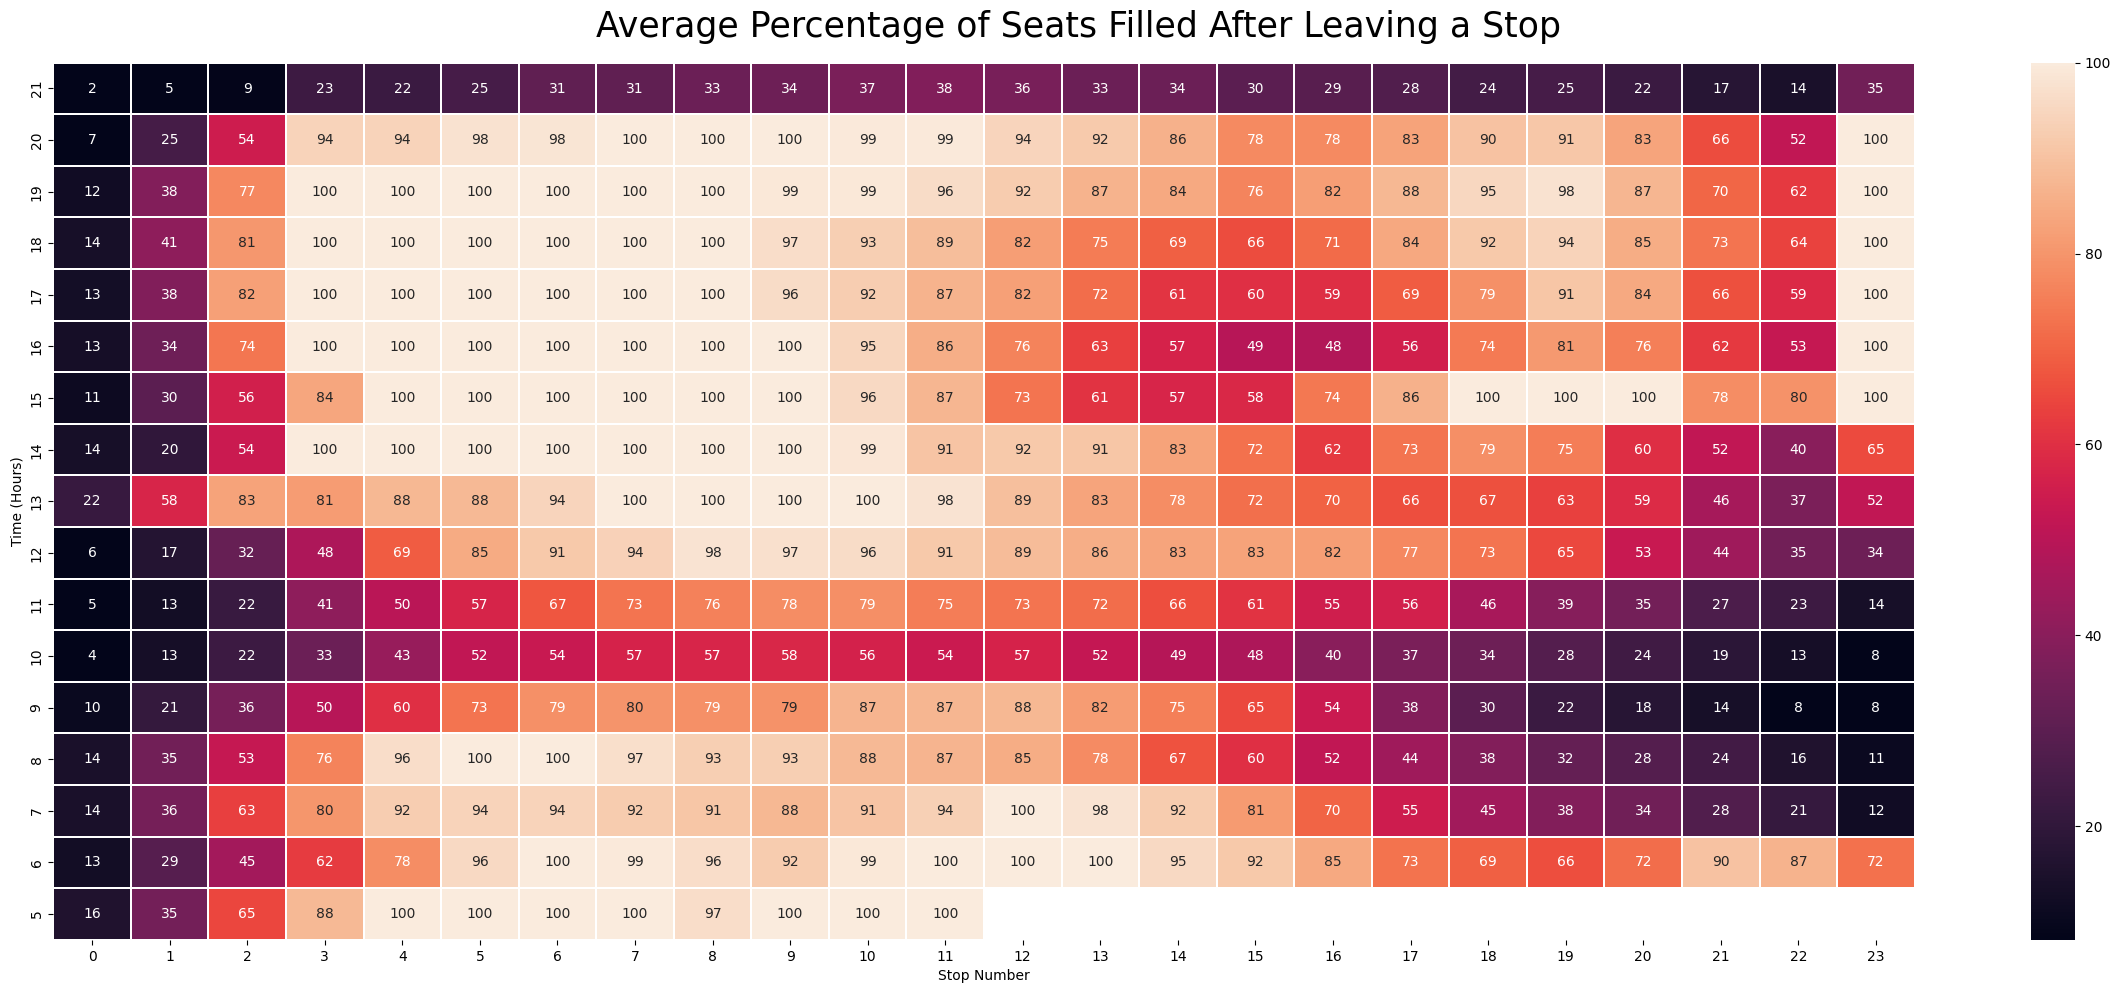

In [12]:
# Visualizing the average percentage of seats filled after leaving a stop
fig, ax = plt.subplots(figsize=(24, 10))
sns.heatmap(capacity_per_place_time, annot = True, fmt = '1.0f', linewidths = 0.1, ax = ax, robust = True)
plt.xlabel('Stop Number')
plt.ylabel('Time (Hours)')
plt.text(7, 17.5, 'Average Percentage of Seats Filled After Leaving a Stop', fontsize = 25)
ax.invert_yaxis()
fig.tight_layout()

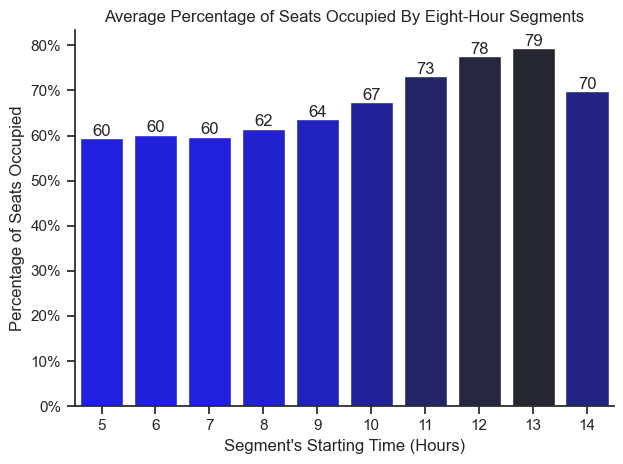

In [13]:
# Visualizing the minimum number of vehicles needed per hour
sns.set_theme(style = 'ticks')
sns.barplot(data = average_per_segment, x = average_per_segment.index, y = 'average', hue = 'average', palette = 'dark:blue_r', legend = False)
sns.despine()
plt.xlabel("Segment's Starting Time (Hours)")
plt.ylabel('Percentage of Seats Occupied')
plt.title('Average Percentage of Seats Occupied By Eight-Hour Segments')
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(1))

for i, value in enumerate(average_per_segment['average'].values.tolist()):
    plt.text(i, value + 0.005, f'{round(value * 100)}', ha = 'center')

plt.tight_layout()

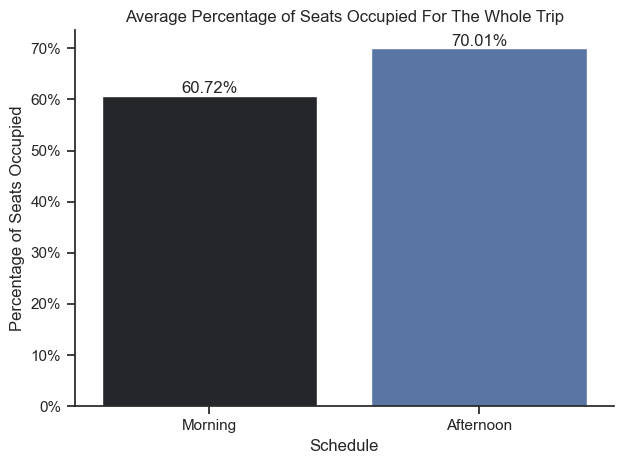

In [14]:
sns.set_theme(style = 'ticks')
sns.barplot(data = average_capacity, x = 'Schedule', y = 'Average Capacity', hue = 'Average Capacity', palette = 'dark:b', legend = False)
sns.despine()
plt.xlabel('Schedule')
plt.ylabel('Percentage of Seats Occupied')
plt.title('Average Percentage of Seats Occupied For The Whole Trip')
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(1))

for i, value in enumerate(average_capacity['Average Capacity'].values.tolist()):
    plt.text(i, value + 0.005, f'{round(value * 100, 2)}%', ha = 'center')

plt.tight_layout()